In [87]:
import numpy as np
import torch as th
from torch.autograd import Variable
from collections import defaultdict as ddict
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib notebook
sns.set(style="darkgrid")

In [88]:
model = th.load('synth.pth')

In [89]:
model.keys()

dict_keys(['model', 'epoch', 'objects'])

In [90]:
model['objects']

[{'label': '0', 'name': '0', 'feature': -1},
 {'label': '41', 'name': '41', 'feature': -1},
 {'label': '100', 'name': '0_0', 'feature': 0},
 {'label': '101', 'name': '0_1', 'feature': 1},
 {'label': '102', 'name': '0_2', 'feature': 2},
 {'label': '103', 'name': '0_3', 'feature': 3},
 {'label': '104', 'name': '0_4', 'feature': 4},
 {'label': '105', 'name': '0_5', 'feature': 5},
 {'label': '106', 'name': '0_6', 'feature': 6},
 {'label': '107', 'name': '0_7', 'feature': 7},
 {'label': '108', 'name': '0_8', 'feature': 8},
 {'label': '1', 'name': '1', 'feature': -1},
 {'label': '19', 'name': '19', 'feature': -1},
 {'label': '2', 'name': '2', 'feature': -1},
 {'label': '50', 'name': '50', 'feature': -1},
 {'label': '109', 'name': '2_0', 'feature': 9},
 {'label': '110', 'name': '2_1', 'feature': 10},
 {'label': '111', 'name': '2_2', 'feature': 11},
 {'label': '112', 'name': '2_3', 'feature': 12},
 {'label': '113', 'name': '2_4', 'feature': 13},
 {'label': '114', 'name': '2_5', 'feature': 14},

In [91]:
colors = np.zeros(len(model['objects']))
for idx in range(len(colors)):
    if model['objects'][idx]['feature'] == -1:
        colors[idx] = 1
    else:
        colors[idx] = -1

In [92]:
embed = model['model']['lt.weight'].numpy()
print(embed.shape)

(307, 2)


<IPython.core.display.Javascript object>


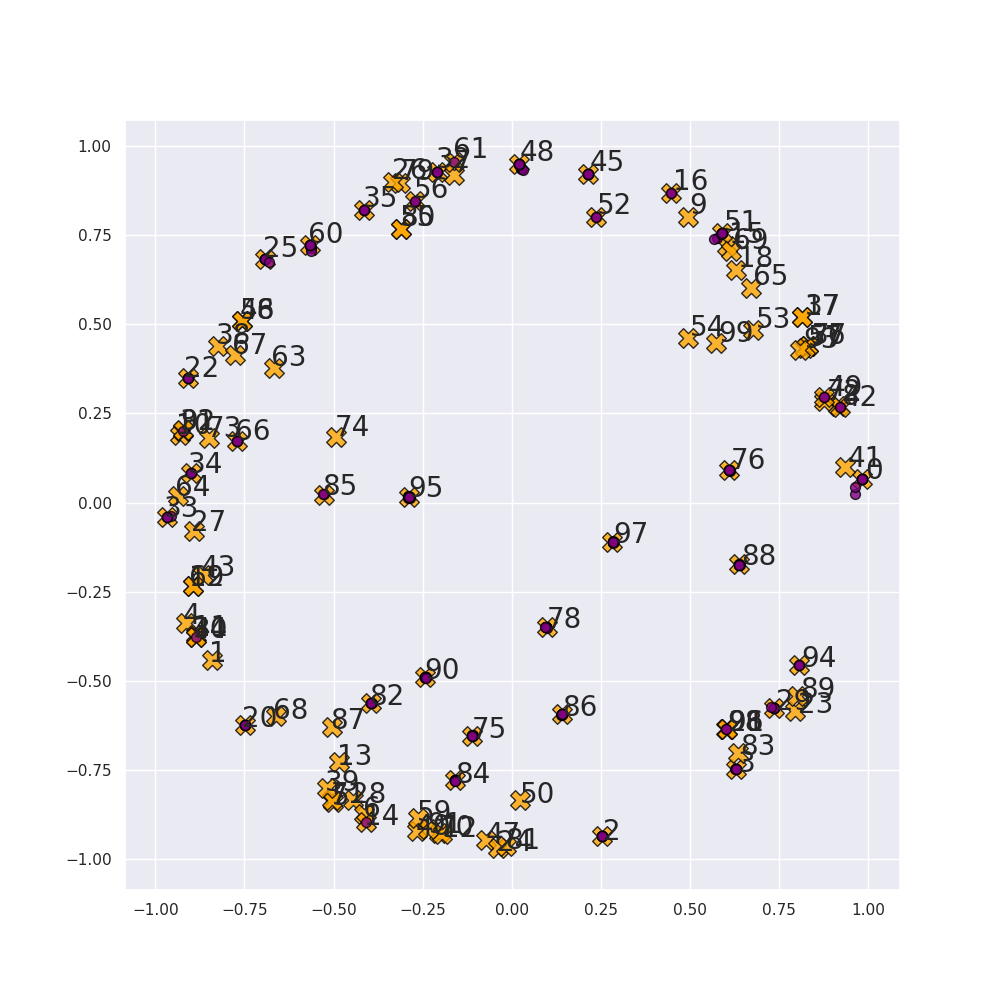

In [93]:
plt.figure(figsize=(10,10))
ax = plt.gca()
for idx in range(len(colors)):
    x = embed[idx,0]
    y = embed[idx,1]
    
    if model['objects'][idx]['feature'] == -1:
        fsize = 18
        size = 200
        displacement = 1.01
        marker = 'X'
        color = 'orange'
    else:
        fsize = 12
        size = 200
        displacement = -1.01
        marker = '.'
        color= 'purple'
    ax.scatter(x=x, y=y, c=color, alpha=0.8, s=size, edgecolor='black', marker=marker)
    if model['objects'][idx]['feature'] == -1:
        #print(x,y)
        plt.text(x * ( displacement), y * ( displacement) , model['objects'][idx]['name'], fontsize=20)

#ax.add_artist(plt.Circle((0,0), 1, color='Blue',fill=False))
plt.show()